In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# <center> Ordinary differential equations and physics Part II </center>

## <center> Handling singularities - branch cuts </center>

Consider the following differential equation, which described the orbit of a test mass around a non-rotating black hole,
\begin{equation}
\left( \dfrac{dr}{d\phi} \right)^2 = \dfrac{r^4}{b^2} - \left( 1 - \dfrac{1}{r} \right) \left( \dfrac{r^4}{a^2} + r^2 \right)
\end{equation}

How does one integrate this? One idea is to just take the one of the square root solutions,
\begin{equation}
\dfrac{dr}{d\phi} = \pm \sqrt{\dfrac{r^4}{b^2} - \left( 1 - \dfrac{1}{r} \right) \left( \dfrac{r^4}{a^2} + r^2 \right)}
\end{equation}

C:\Users\Sonny Ibias\AppData\Local\Temp\ipykernel_3632\4055045589.py:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((r**4)/(b**2) - (1-1/r)*((r**4)/(a**2) + r**2))


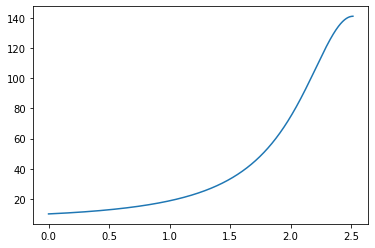

In [3]:
def rk4_int(phi, r , f, h):
    """
    Integration step according to RK4
    """
    k1 = f(phi, r)
    k2 = f(phi + h/2, r + h * k1/2)
    k3 = f(phi + h/2, r + h * k2/2)
    k4 = f(phi + h, r + h * k3)
    
    return phi+h, r + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

def dr_p(phi, r):
    """
    Positive root prescription.
    """
    return np.sqrt((r**4)/(b**2) - (1-1/r)*((r**4)/(a**2) + r**2))

a = 3.0
b = 3.01

r = 10
phi = 0

h = 1E-3
T = 100
N = int(T/h)+1

r_traj = [r]
phi_traj = [phi]

for _ in range(N):
    phi,r = rk4_int(phi,r,dr_p,h)
    r_traj.append(r)
    phi_traj.append(phi)

r_traj = np.array(r_traj)
phi_traj = np.array(phi_traj)
    
plt.plot(phi_traj, r_traj)


Why does the graph suddenly stop? It's because of the branch cut! To continue evolving, we need to switch to the negative prescription because we would be entering the part of the orbit where the radius starts decreasing.

By choosing a single root, we fail to capture at least half the dynamics of the orbit. The solution is very simple: just take the derivative, and replace derivatives where appropriate. We'd get the second order differential equation,
\begin{equation}
\dfrac{d^2 r}{d \phi^2} = \dfrac{1}{2} - r + 3 \dfrac{r^2}{2a^2} + 2\left(\dfrac{1}{b^2} - \dfrac{1}{a^2} \right) r^3
\end{equation}
Now, the equations
\begin{equation}
\dfrac{dr}{d\phi} = \pm \sqrt{\dfrac{r^4}{b^2} - \left( 1 - \dfrac{1}{r} \right) \left( \dfrac{r^4}{a^2} + r^2 \right)}
\end{equation}
correspond to initial data for $\dfrac{dr}{d\phi}$. That is, at a given $r(0) = r_0$, is the particle plunging or not?

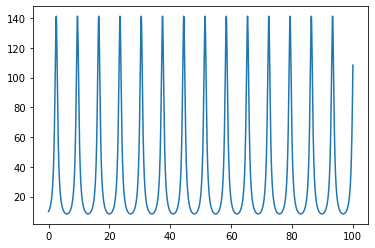

In [4]:
def ddr(phi,r):
    """
    r[0] -> position
    r[1] -> velocity
    """
    d_r = r[1]
    dd_r = 1/2 - r[0] + (3 * r[0]**2)/ (2 * a**2) + 2 * (1/b**2 - 1/a**2) * r[0]**3
    return np.array([d_r,dd_r])

a = 3.
b = 3.01
r = 10.
dr = dr_p(0,r)
data = np.array([r,dr])
phi = 0


h = 1E-3
T = 100
N = int(T/h)+1

r_traj = [r]
phi_traj = [phi]

for _ in range(N):
    phi,data = rk4_int(phi,data,ddr,h)
    r_traj.append(data[0])
    phi_traj.append(phi)

r_traj = np.array(r_traj)
phi_traj = np.array(phi_traj)

plt.plot(phi_traj, r_traj)

We may also change coordinates from polar $(r, \phi)$ to  cartesian $(x,y)$.

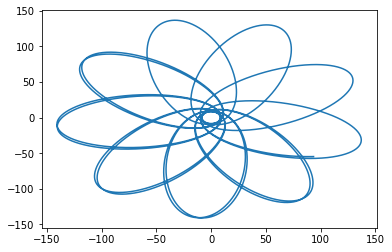

In [5]:
x_traj = r_traj * np.cos(phi_traj)
y_traj = r_traj * np.sin(phi_traj)
plt.plot(x_traj,y_traj)

## <center> Handling singularities - singular initial conditions </center>

There are occasions where a perfectly well-behaved solution exists, but we are forced to start at an initial condition in which the differential equation describing the solution is singular.

Consider the following differential equation,
\begin{equation}
\dfrac{dy}{dt} = \dfrac{1}{\sqrt{t}}
\end{equation}
which has the exact solution,
\begin{equation}
y(t) = 2 \sqrt{t} + c
\end{equation}
How does one integrate this for the initial condition $y(0) = c$?

The main problem here is that there is no Taylor series solution at $t = 0$. One cannot perturb around the initial condition, and start there. The idea is to Taylor series expand around $y(h)$ in such a way that it is related to $y(0)$. That is,
\begin{equation}
y(0) = y(h - h) = y(h) - h \dfrac{dy(h)}{dt} + \dfrac{h^2}{2} \dfrac{d^2 y(h)}{dt^2} + \dots
\end{equation}
Thus, to first order in $h$, we may start with the initial condition
\begin{equation}
y(h) \approx y(0) + h \dfrac{dy(h)}{dt}
\end{equation}
For this particular problem,
\begin{equation}
y(h) \approx y(0) + \sqrt{h} = c + \sqrt{h}
\end{equation}

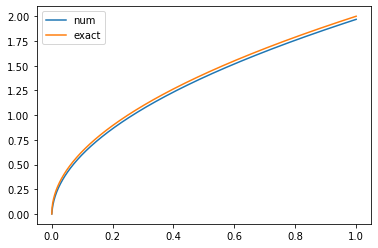

In [14]:
def dy(t,y):
    return 1/np.sqrt(t)

y = 0
t = 0

h = 1E-3
T = 1
N = int(T/h)+1

y_traj = [y]
t_traj = [t]

#perturbation
y = y + np.sqrt(h)
t = h

y_traj.append(y)
t_traj.append(t)

for _ in range(N-1):
    t,y = rk4_int(t,y,dy,h)
    y_traj.append(y)
    t_traj.append(t)
    
t_traj = np.array(t_traj)

plt.plot(t_traj,y_traj, label='num')
plt.plot(t_traj, 2* np.sqrt(t_traj), label='exact')
plt.legend()